In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

1st stage studing the Data. First i want to superfissialy see what's the data that I got.

In [3]:
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [4]:
# conveerting the unix date-time to readabler date time so I can analyze it.
for col in ['deadline','state_changed_at','created_at','launched_at']:
    df[col] = pd.to_datetime(df[col],unit='s')

In [5]:
df.head()


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108128 non-null object
desc                     108121 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null datetime64[ns]
state_changed_at         108129 non-null datetime64[ns]
created_at               108129 non-null datetime64[ns]
launched_at              108129 non-null datetime64[ns]
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), datetime64[ns](4), float64(1), int64(2), object(6)
memory usage: 8.4+ MB


In [7]:
# create a copy of the df
df1=df.copy()

Experimenting with date to find any feature that will relate to sucess or failure. I didnt find anything useful with time so removing 

In [8]:
temp = pd.DatetimeIndex(df1['state_changed_at'])
df1['state_changed_at_date'] = temp.date
del df1['state_changed_at']


In [9]:
temp = pd.DatetimeIndex(df1['deadline'])
df1['deadline_date'] = temp.date
del df1['deadline']

In [10]:
temp = pd.DatetimeIndex(df1['created_at'])
df1['created_at_date'] = temp.date
del df1['created_at']

In [11]:
temp = pd.DatetimeIndex(df1['launched_at'])
df1['launched_at_date'] = temp.date
del df1['launched_at']

In [12]:
df1.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,backers_count,final_status,state_changed_at_date,deadline_date,created_at_date,launched_at_date
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,3,1,2009-05-03,2009-05-03,2009-04-24,2009-04-24
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2,0,2009-05-16,2009-05-15,2009-04-28,2009-04-29
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,0,0,2009-05-22,2009-05-22,2009-05-12,2009-05-12
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,18,1,2009-05-29,2009-05-29,2009-04-29,2009-04-29
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1,0,2009-05-31,2009-05-31,2009-05-01,2009-05-01


finding difference in date 
|

In [13]:
#creating a separate Pd data frame to study the date and dep variable 
date_data=pd.DataFrame()
for col  in ['final_status','deadline_date','state_changed_at_date','created_at_date','launched_at_date']:
    date_data[col]=df1[col]


# -----------------------------------------------------------

In [14]:
date_data.head()

,final_status,deadline_date,state_changed_at_date,created_at_date,launched_at_date
0,1,2009-05-03,2009-05-03,2009-04-24,2009-04-24
1,0,2009-05-15,2009-05-16,2009-04-28,2009-04-29
2,0,2009-05-22,2009-05-22,2009-05-12,2009-05-12
3,1,2009-05-29,2009-05-29,2009-04-29,2009-04-29
4,0,2009-05-31,2009-05-31,2009-05-01,2009-05-01


In [15]:
#differince in dates based on their progess
date_data['Diff_date_deadline_status']=date_data['state_changed_at_date']-date_data['deadline_date']


In [16]:
date_data['Diff_date_deadline_status'].head()

0   0 days
1   1 days
2   0 days
3   0 days
4   0 days
Name: Diff_date_deadline_status, dtype: timedelta64[ns]

In [17]:
k= pd.crosstab(index=date_data["Diff_date_deadline_status"],  # Make a crosstab
                      columns=date_data["final_status"])

In [18]:
date_data['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [19]:
k

final_status,0,1
Diff_date_deadline_status,,
-90 days,3,0
-89 days,3,0
-88 days,1,0
-86 days,2,0
-85 days,1,0
-84 days,1,0
-82 days,1,0
-81 days,1,0
-80 days,2,0


In [20]:
print(k[k[1]!=0])

final_status                   0      1
Diff_date_deadline_status              
0 days                     67829  34531
1 days                        60     30


In [21]:
date_data['Diff_date_deadline_status']

0          0 days
1          1 days
2          0 days
3          0 days
4          0 days
5          0 days
6          0 days
7          0 days
8          0 days
9          0 days
10         0 days
11         0 days
12         0 days
13         0 days
14         0 days
15         0 days
16         0 days
17         0 days
18         0 days
19         0 days
20         0 days
21         0 days
22         0 days
23         0 days
24         0 days
25         0 days
26         0 days
27         0 days
28         0 days
29         0 days
           ...   
108099     0 days
108100     0 days
108101     0 days
108102     0 days
108103     0 days
108104     0 days
108105     0 days
108106     0 days
108107     0 days
108108   -20 days
108109     0 days
108110     0 days
108111     0 days
108112     0 days
108113     0 days
108114     0 days
108115     0 days
108116     0 days
108117     0 days
108118     0 days
108119     0 days
108120     0 days
108121     0 days
108122     0 days
108123    

# This shows only when deadline and status update hs been 0 or 1 then only project passed


In [22]:
date_data["Diff_date_deadline_status"].value_counts()

0 days      102360
-29 days       244
-1 days        219
-30 days       211
-28 days       193
-9 days        179
-26 days       173
-25 days       172
-2 days        171
-27 days       171
-19 days       170
-23 days       168
-24 days       164
-14 days       154
-17 days       153
-3 days        152
-6 days        145
-8 days        145
-5 days        144
-16 days       144
-10 days       138
-4 days        138
-22 days       133
-12 days       133
-15 days       132
-20 days       130
-7 days        129
-18 days       128
-13 days       126
-11 days       120
             ...  
-50 days        17
-51 days        16
-42 days        16
-48 days        13
-62 days         3
-61 days         3
-89 days         3
-64 days         3
-90 days         3
-86 days         2
-80 days         2
-76 days         2
-78 days         1
-66 days         1
12 days          1
-71 days         1
-73 days         1
-67 days         1
295 days         1
10 days          1
-74 days         1
-75 days    

In [23]:
date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 6 columns):
final_status                 108129 non-null int64
deadline_date                108129 non-null object
state_changed_at_date        108129 non-null object
created_at_date              108129 non-null object
launched_at_date             108129 non-null object
Diff_date_deadline_status    108129 non-null timedelta64[ns]
dtypes: int64(1), object(4), timedelta64[ns](1)
memory usage: 3.3+ MB


In [24]:
#Converting to intiger 
date_data["Diff_date_deadline_status"]= date_data["Diff_date_deadline_status"].dt.days

In [25]:
# I will change them to 0 to 1... I was having problem with a single condition so using 2 to get it right. 
for i in range(len(date_data)):
    if date_data["Diff_date_deadline_status"][i] in [0,1]:
        date_data.loc[i,"Diff_date_deadline_status"]=999
date_data["Diff_date_deadline_status"]=np.where(date_data["Diff_date_deadline_status"]==999,1,0)

In [26]:
date_data["Diff_date_deadline_status"].value_counts()

1    102450
0      5679
Name: Diff_date_deadline_status, dtype: int64

In [27]:
# check difference between deadline and launched
date_data['Diff_date_deadline_launch']=date_data['launched_at_date']-date_data['deadline_date']

In [28]:
pd.crosstab(index=date_data["Diff_date_deadline_launch"],  # Make a crosstab
                      columns=date_data["final_status"])

final_status,0,1
Diff_date_deadline_launch,,
-92 days,4,2
-91 days,104,32
-90 days,432,146
-89 days,115,55
-88 days,37,7
-87 days,21,8
-86 days,18,10
-85 days,18,10
-84 days,16,5


In [29]:
date_data["Diff_date_deadline_launch"]= date_data["Diff_date_deadline_launch"].dt.days

In [30]:
#created_at_date  ,launched_at_date

date_data["Diff_date_created_launch"]=date_data['launched_at_date']-date_data['created_at_date']




In [31]:
pd.crosstab(index=date_data["Diff_date_created_launch"],  # Make a crosstab
                      columns=date_data["final_status"])

final_status,0,1
Diff_date_created_launch,,
0 days,7375,2048
1 days,6059,2025
2 days,4812,1717
3 days,4310,1486
4 days,3429,1394
5 days,3050,1298
6 days,2729,1223
7 days,2391,1216
8 days,2057,1066


In [32]:
date_data["Diff_date_created_launch"]= date_data["Diff_date_created_launch"].dt.days

In [33]:
date_data.head()

,final_status,deadline_date,state_changed_at_date,created_at_date,launched_at_date,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch
0,1,2009-05-03,2009-05-03,2009-04-24,2009-04-24,1,-9,0
1,0,2009-05-15,2009-05-16,2009-04-28,2009-04-29,1,-16,1
2,0,2009-05-22,2009-05-22,2009-05-12,2009-05-12,1,-10,0
3,1,2009-05-29,2009-05-29,2009-04-29,2009-04-29,1,-30,0
4,0,2009-05-31,2009-05-31,2009-05-01,2009-05-01,1,-30,0


In [34]:
date_data=date_data.drop(['deadline_date','state_changed_at_date','created_at_date',
           'launched_at_date',],1)

In [35]:
date_data.head()

,final_status,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch
0,1,1,-9,0
1,0,1,-16,1
2,0,1,-10,0
3,1,1,-30,0
4,0,1,-30,0


In [36]:
# Now i will run a regression to see the impact of the data
from sklearn.ensemble import ExtraTreesClassifier
y=date_data['final_status']
x=date_data.drop(['final_status'],1)

In [37]:
model = ExtraTreesClassifier()
model.fit(x, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [38]:
print(model.feature_importances_)

[ 0.17292152  0.31894807  0.50813041]


In [39]:
date_data=date_data.drop(['final_status'],1)

It seems all of them are important in a sence thet they are not too low. 

In [40]:
df1=pd.concat([df1,date_data,],1)

In [41]:
df1=df1.drop(['deadline_date','state_changed_at_date',
              'created_at_date','launched_at_date'],1)

In [42]:
df1.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,backers_count,final_status,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,3,1,1,-9,0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2,0,1,-16,1


In [43]:
df1.shape

(108129, 13)

In [44]:
df1.disable_communication.value_counts()


False    107806
True        323
Name: disable_communication, dtype: int64

In [45]:
pd.crosstab(df["final_status"],df["disable_communication"] , margins=True)

disable_communication,False,True,All
final_status,,,
0,73245,323,73568
1,34561,0,34561
All,107806,323,108129


In [46]:
df1['Dis_com N']= np.where(df1['disable_communication']==False,1,0)

In [47]:
df1=df1.drop(['disable_communication'],1)

In [48]:
df1['country'].value_counts()

US    92033
GB     8758
CA     3736
AU     1880
NL      705
NZ      355
SE      240
DK      196
NO      114
IE      111
DE        1
Name: country, dtype: int64

In [49]:
pd.crosstab(index=df["country"],  # Make a crosstab
                      columns=df["final_status"])

final_status,0,1
country,,
AU,1537,343
CA,2899,837
DE,1,0
DK,152,44
GB,6248,2510
IE,88,23
NL,617,88
NO,96,18
NZ,275,80


In [50]:
df1['currency'].value_counts()

USD    92033
GBP     8758
CAD     3736
AUD     1880
EUR      817
NZD      355
SEK      240
DKK      196
NOK      114
Name: currency, dtype: int64

country and currency are closely related so removing currency as there is no significane on what currency payment is done but place of project is important

In [51]:
dummy1=pd.get_dummies(df1['country'],prefix='cty')

In [52]:
dummy1.head()

,cty_AU,cty_CA,cty_DE,cty_DK,cty_GB,cty_IE,cty_NL,cty_NO,cty_NZ,cty_SE,cty_US
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1


In [53]:
df1=pd.concat([df1,dummy1],1)

In [54]:
df1=df1.drop(['cty_DE','cty_IE','country','currency'],1)

In [55]:
df1.head()

,project_id,name,desc,goal,keywords,backers_count,final_status,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch,Dis_com N,cty_AU,cty_CA,cty_DK,cty_GB,cty_NL,cty_NO,cty_NZ,cty_SE,cty_US
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,3,1,1,-9,0,1,0,0,0,0,0,0,0,0,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,2,0,1,-16,1,1,0,0,0,0,0,0,0,0,1
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,0,0,1,-10,0,1,0,0,0,0,0,0,0,0,1
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,18,1,1,-30,0,1,0,0,0,0,0,0,0,0,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,1,0,1,-30,0,1,0,0,0,0,0,0,0,0,1


now we begine the text part analysis 
first keywords



In [56]:
import nltk
import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [57]:
text1=pd.DataFrame()
text1=df1['keywords'].astype('str')

In [58]:
# function to remove the stopwords and puncuation

def text_process(mess):
   # Check characters to see if they are in punctuation
    mess = mess.replace('-'," ")
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    ps=PorterStemmer()
    # Now just remove any stopwords and steaming
    k1=[ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]   
    return ' '.join(k1)

In [59]:
k2=text1.apply(text_process).astype('str')

In [60]:
k2

0                                               draw dollar
1         sponsor dereck blackburn lostwar artist resid ...
2                                                mr squiggl
3                                   help write second novel
4                               support cast sculptur bronz
5                                              daili digest
6                                    igoozex free iphon app
7                                       drive faster car 20
8                                          lostl tini giant
9                           choos adventur robot paint seri
10                            anatomi credibl meltdown book
11           bit artist book analog draw inspir digit pixel
12           indi nerd board game need hero miniatur sculpt
13                                    awesom icon iphon app
14               help make webseri pilot crime anti violenc
15                                            project pedal
16                     frank magazin ero

In [61]:
k3=pd.DataFrame()
k3['text']=k2
k3['text'].head()

0                                          draw dollar
1    sponsor dereck blackburn lostwar artist resid ...
2                                           mr squiggl
3                              help write second novel
4                          support cast sculptur bronz
Name: text, dtype: object

# ------------------------------------------------------------------------------------------------------------

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer=text_process).fit(text1)



In [63]:
from sklearn.feature_extraction.text import TfidfTransformer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features = 100, max_df = 1.0, min_df = 1, 
                       use_idf = True,analyzer = 'word', ngram_range = (1,1))
X = vect.fit_transform(k3['text'])
tx1 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
df3= pd.concat([df1, tx1], axis=1)
df3=df3.drop(['keywords'],1)

df3.head()


,project_id,name,desc,goal,backers_count,final_status,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch,Dis_com N,...,studio,time,tour,us,video,vinyl,war,web,world,year
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,3,1,1,-9,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,2,0,1,-16,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,0,0,1,-10,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,18,1,1,-30,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,1,0,1,-30,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# little analysis of the data in 

In [66]:
df3['desc'].describe()

count                                                108121
unique                                               107378
top       The Decentralized Dance Party was founded on t...
freq                                                     20
Name: desc, dtype: object

In [67]:
df3['desc']=df3['desc'].astype('str')
df3['desc']=df3['desc'].apply(text_process).astype('str')

df3['desc_len']=df3['desc'].apply(len)

In [68]:
df3['desc_len'].head()

0    68
1    80
2    79
3    71
4    82
Name: desc_len, dtype: int64

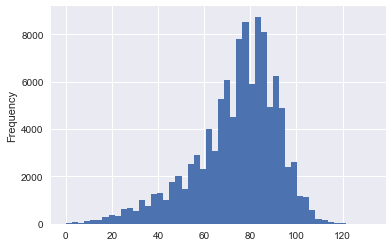

In [69]:
df3['desc_len'].plot.hist(bins=50)

In [70]:
df3['desc_len'].describe()

count    108129.000000
mean         73.818134
std          18.305663
min           0.000000
25%          64.000000
50%          77.000000
75%          87.000000
max         132.000000
Name: desc_len, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1E7587B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1E749190>], dtype=object)

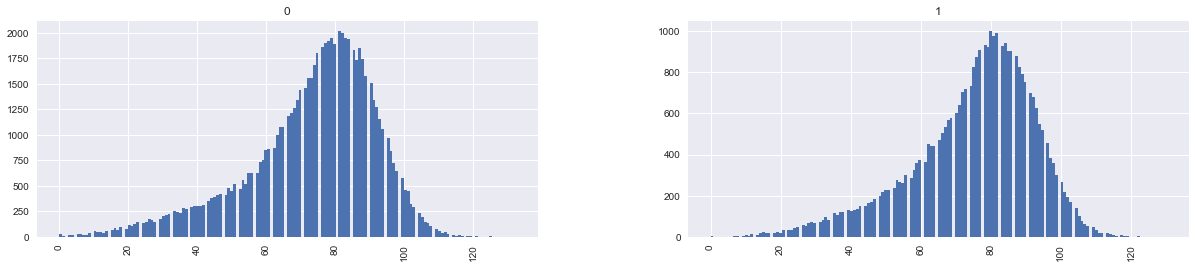

In [71]:
df3.hist(column='desc_len',by='final_status', bins=160,figsize=(20,4))

# There is suttle difference will see if it helps 

In [72]:
#removing and preparing the final table 

df3.head(2)


,project_id,name,desc,goal,backers_count,final_status,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch,Dis_com N,...,time,tour,us,video,vinyl,war,web,world,year,desc_len
0,kkst1451568084,drawing for dollars,like draw pictur color thought would suggest s...,20.0,3,1,1,-9,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,dereck blackburn take upon incred journey mont...,300.0,2,0,1,-16,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80


In [73]:
df4=df3.copy()

In [74]:
y=df4['final_status']

In [75]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: final_status, dtype: int64

In [76]:
df4=df4.drop(['project_id','name','desc','final_status'],1)

In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df4,y, test_size=0.3, stratify=y, random_state=0)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
classifier=LogisticRegression(class_weight="balanced",random_state=2)

In [79]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=2,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [80]:
pred=classifier.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test, pred)

0.85856530719196034

In [83]:
names = df4.columns.values 

# Running the model on test data

In [85]:
tf=pd.read_csv('test.csv')

In [86]:
tf.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620


In [87]:
project_id=pd.DataFrame()
project_id['project_id']=tf['project_id']

In [88]:
tf.shape

(63465, 12)

In [89]:
for col in ['deadline','state_changed_at','created_at','launched_at']:
    tf[col] = pd.to_datetime(tf[col],unit='s')

temp = pd.DatetimeIndex(tf['state_changed_at'])
tf['state_changed_at_date'] = temp.date
del tf['state_changed_at']


temp = pd.DatetimeIndex(tf['deadline'])
tf['deadline_date'] = temp.date
del tf['deadline']

temp = pd.DatetimeIndex(tf['created_at'])
tf['created_at_date'] = temp.date
del tf['created_at']

temp = pd.DatetimeIndex(tf['launched_at'])
tf['launched_at_date'] = temp.date
del tf['launched_at']

tf['Diff_date_deadline_status']=tf['state_changed_at_date']-tf['deadline_date']

tf["Diff_date_deadline_status"]= tf["Diff_date_deadline_status"].dt.days

for i in range(len(tf)):
    if tf["Diff_date_deadline_status"][i] in [0,1]:
        tf.loc[i,"Diff_date_deadline_status"]=999

        tf["Diff_date_deadline_status"]=np.where(tf["Diff_date_deadline_status"]==999,1,0)

tf['Diff_date_deadline_launch']=tf['launched_at_date']-tf['deadline_date']

tf["Diff_date_deadline_launch"]= tf["Diff_date_deadline_launch"].dt.days

tf["Diff_date_created_launch"]=tf['launched_at_date']-tf['created_at_date']

tf["Diff_date_created_launch"]= tf["Diff_date_created_launch"].dt.days

tf=tf.drop(['deadline_date','state_changed_at_date','created_at_date',
           'launched_at_date',],1)

In [90]:
tf.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,0,-40,1
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,0,-35,2


now othe variables 

In [91]:
tf['Dis_com N']= np.where(tf['disable_communication']==False,1,0)


In [94]:
dummy1=pd.get_dummies(tf['country'],prefix='cty')

In [95]:
dummy1.head(2)

,cty_AT,cty_AU,cty_BE,cty_CA,cty_CH,cty_DE,cty_DK,cty_ES,cty_FR,cty_GB,...,cty_IE,cty_IT,cty_LU,cty_MX,cty_NL,cty_NO,cty_NZ,cty_SE,cty_SG,cty_US
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
dummy1=dummy1.drop(['cty_AT','cty_BE','cty_SG','cty_MX','cty_LU','cty_IT','cty_IE','cty_FR','cty_ES',
                  'cty_DE','cty_CH','cty_HK'],1)


In [97]:
tf=pd.concat([tf,dummy1],1)



In [98]:
tf.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,Diff_date_deadline_status,Diff_date_deadline_launch,...,Dis_com N,cty_AU,cty_CA,cty_DK,cty_GB,cty_NL,cty_NO,cty_NZ,cty_SE,cty_US
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,0,-40,...,1,0,0,0,0,0,0,0,0,1
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,0,-35,...,1,0,0,0,0,0,0,0,0,1


In [99]:
tf2=tf.drop(['country','currency'],1)

In [100]:
text2=pd.DataFrame()
text2=tf2['keywords']
k2=text2.apply(text_process).astype('str')

In [101]:
k3=pd.DataFrame()
k3['text']=k2

In [102]:
X = vect.fit_transform(k3['text'])
tx1 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

In [103]:
tf3= pd.concat([tf2, tx1], axis=1)

In [104]:
tf3['desc']=tf3['desc'].astype('str')
tf3['desc_len']=tf3['desc'].apply(len)

In [105]:
tf3.head(2)

,project_id,name,desc,goal,keywords,disable_communication,Diff_date_deadline_status,Diff_date_deadline_launch,Diff_date_created_launch,Dis_com N,...,travel,truck,ultim,us,video,war,watch,way,world,desc_len
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,0,-40,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,0,-35,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119


In [106]:
tf3=tf3.drop(['desc','name','project_id','keywords','disable_communication'],1)

In [107]:
tf3['backers_count']=0

In [108]:
pred=classifier.predict(tf3)